# Skład zespołu
 - Jakub Eichner 
 - Mateusz Ogrodowczyk
 - Julian Zabłoński

#### Zadanie 1:

Utwórz zbiór danych reprezentujących dwupikselowe obrazy z jednobajtowym modelem koloru. Obrazy należą do dwóch klas: pierwsza z nich zawiera obrazy, których wartość $p_2$ drugiego piksela jest mniejsza od $a*p_1+b$, gdzie $p_1$ reprezentuje wartość pierwszego  piksela. W drugiej klasie wartość drugiego piksela jest większa od $a*p_1+b$.  <a href="https://fraktal.faculty.wmi.amu.edu.pl/symulowanie_wizualne/data_lab2.png">Rysunek</a> pokazuje przykład takich danych dla $a=1,\,b=0$.
Zapisz te dane jako zbiór obrazów należących do dwóch klas (nazwy katalogów oznaczają klasy). Na tak skonstruowanych danych przetestuj iteracje algorytmu regresji logistycznej w każdym kroku wizualizując hiperpłaszczyznę separującą. Przykładowy wynik pokazany jest na kolejnym <a href="https://fraktal.faculty.wmi.amu.edu.pl/symulowanie_wizualne/result_lab2.png">rysunku</a>.



In [97]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 

Class 1 → 1	Class 2 → 0
Class 1 → 2	Class 2 → 0
Class 1 → 3	Class 2 → 0
Class 1 → 3	Class 2 → 1
Class 1 → 3	Class 2 → 2
Class 1 → 4	Class 2 → 2
Class 1 → 4	Class 2 → 3
Class 1 → 4	Class 2 → 4
Class 1 → 5	Class 2 → 4
Class 1 → 6	Class 2 → 4
Class 1 → 7	Class 2 → 4
Class 1 → 7	Class 2 → 5
Class 1 → 8	Class 2 → 5
Class 1 → 8	Class 2 → 6
Class 1 → 9	Class 2 → 6
Class 1 → 10	Class 2 → 6
Class 1 → 11	Class 2 → 6
Class 1 → 12	Class 2 → 6
Class 1 → 12	Class 2 → 7
Class 1 → 12	Class 2 → 8
Class 1 → 12	Class 2 → 9
Class 1 → 13	Class 2 → 9
Class 1 → 14	Class 2 → 9
Class 1 → 14	Class 2 → 10
Class 1 → 15	Class 2 → 10
Class 1 → 16	Class 2 → 10
Class 1 → 16	Class 2 → 11
Class 1 → 16	Class 2 → 12
Class 1 → 16	Class 2 → 13
Class 1 → 17	Class 2 → 13
Class 1 → 18	Class 2 → 13
Class 1 → 18	Class 2 → 14
Class 1 → 18	Class 2 → 15
Class 1 → 18	Class 2 → 16
Class 1 → 18	Class 2 → 17
Class 1 → 19	Class 2 → 17
Class 1 → 19	Class 2 → 18
Class 1 → 19	Class 2 → 19
Class 1 → 19	Class 2 → 20
Class 1 → 20	Class 2 → 2

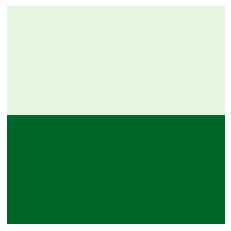

In [98]:
#Kod rozwiązania zadania 1
AMMOUNT = 100
A = 1
B = 0
def generate_data(
    amount: int = 100, 
    seed_val: int = 42
) -> np.array:
    np.random.seed(seed_val)
    return np.random.random((amount, 2))

def verify_class(data: np.array, a: int = A, b: int = B) -> bool:
    return data[1] > a*data[0] + b

def create_plot_img(data: np.array, c1: int, c2: int) -> tuple:
    img_class = verify_class(data) + 1
    c1 += img_class % 2
    c2 += (img_class+1) % 2
    plot = plt.imshow(
        ((data[0], data[0]), (data[1], data[1])), 
        cmap='Greens', 
        interpolation='nearest', 
        origin='lower',
        vmin=0.,
        vmax=1.
    )    
    # plot.set_cmap('Greens')
    plt.axis('off')
    plt.savefig(f'./{img_class}/{c1 if img_class == 1 else c2}.png', bbox_inches=0)
    return c1, c2, img_class-1
    

# Create directories for the images
if not os.path.exists('./1'):
    os.mkdir('./1')
if not os.path.exists('./2'):
    os.mkdir('./2')
    
# Generate the data
data = generate_data(AMMOUNT, 89)
# print(data[:min(len(data), 10)])\
y = []
counter1, counter2 = 0, 0
for i, pair in enumerate(data):
    counter1, counter2, img_class = create_plot_img(pair, counter1, counter2)
    y.append(img_class)
    print(f"Class 1 → {counter1}\tClass 2 → {counter2}")


In [99]:
#Test rozwiązania  zadania 1
 
    # YOUR CODE HERE
    
    #raise NotImplementedError()

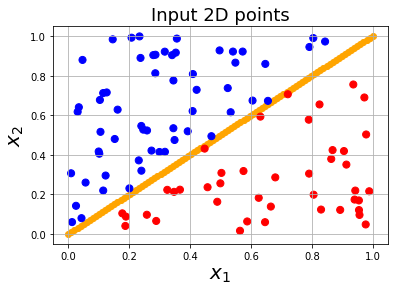

In [100]:
colormap = np.array(['r', 'b'])

x_line = np.linspace(0,1,100)
y_line = A*x_line + B

def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(x_line, y_line, c='orange')
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)

plot_scatter(data, y, colormap, 'image.png')

In [101]:
sigmoid = lambda x: 1/(1+np.exp(-x))

w = np.array([6.33, -4.22])   # some magical w
b = 1.99                      # some magical b
x = np.array([-1.2, 1.0])     # point we want to classify

print(sigmoid(w.dot(x) + b))

5.402552018717133e-05


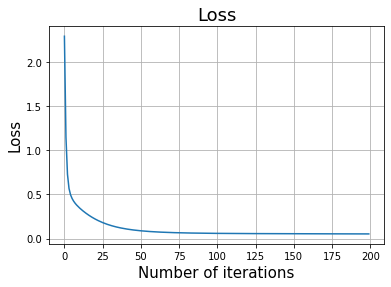

In [102]:
LEARNING_RATE = 8.0
NUM_EPOCHS = 200

def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

# some nice initial value, so that the plot looks nice.
w = np.array([-4.0, 29.0])
b = 0.0

for i in range(NUM_EPOCHS):
  dw = np.zeros(w.shape)
  db = 0.0
  loss = 0.0

  for j in range(data.shape[0]):
    x_j = data[j,:]
    y_j = y[j]

    z_j = w.dot(x_j) + b
    a_j = sigmoid(z_j)

    loss_j = get_loss_numerically_stable(y_j, z_j)

    dw_j = x_j * (a_j-y_j)
    db_j = a_j - y_j

    dw += dw_j
    db += db_j
    loss += loss_j

  # because we have AMMOUNT samples
  dw = (1.0/AMMOUNT) * dw
  db = (1.0/AMMOUNT) * db
  loss = (1.0/AMMOUNT) * loss

  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db

  w_cache.append(w.copy())
  b_cache.append(b)
  l_cache.append(loss)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(l_cache)
# plt.close()
# plt.clf()
# plt.cla()

MovieWriter avconv unavailable; using Pillow instead.


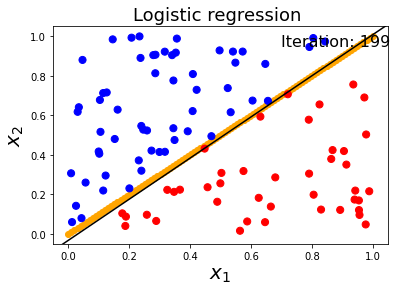

In [103]:
import matplotlib.animation as animation


fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)
ax.set_facecolor('xkcd:white')
ax.scatter(x_line, y_line, c='orange')

ax.set_title('Logistic regression ', size = 18)

def animate(i):
  xs = np.array([-2.0, 2.0])
  ys = (-w_cache[i][0] * xs - b)/w_cache[i][1]
  lines.set_data(xs, ys)

  text_box.set_text('Iteration: {}'.format(i))

  return lines, text_box

lines, = ax.plot([], [], c='black')
ax.scatter(data[:,0], data[:,1], s=50, c=colormap[y])
text_box = ax.text(0.7, 0.95, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(w_cache), blit=True, interval=500)
anim.save('animation.gif', writer='avconv', fps=22, codec="libx264")